In [2]:
!pwd

/home/viluiz/PhD_work/ReactiveTransport/TestCase1.CationExchange


In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from glob import glob
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

import matplotlib as mpl


In [2]:
pd.__version__

'1.4.1'

In [3]:
df = pd.read_csv('dataset_CationExchange.csv')

In [4]:
df

,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
0,0.642689,0.711871,0.611395,0.125213,0.873227,0.376213,1.223379,0.722010,1.245687,1.453523,0.58550,0.7119,0.6156,0.2354,0.8732
1,0.857729,0.154843,0.888883,0.148389,0.881746,0.567666,0.017635,0.560129,1.095512,0.445821,0.81960,0.1548,0.8853,0.2282,0.8817
2,1.161986,0.198999,1.174069,1.118206,0.838414,0.350508,0.697206,1.323158,1.484655,1.279527,1.11400,0.1990,1.1870,1.2010,0.8384
3,1.203371,0.176078,0.532719,0.268855,0.566878,0.607084,1.397875,1.238842,0.549554,0.201428,1.18200,0.1761,0.5472,0.2976,0.5669
4,0.687452,0.461018,1.278800,0.086210,1.300093,0.968308,1.262408,0.882565,0.771424,1.129990,0.67080,0.4610,1.2700,0.1286,1.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.473335,0.432462,0.915532,0.686341,0.905682,1.362943,1.337128,0.091275,0.109586,0.832622,1.49300,0.4325,0.9064,0.6558,0.9057
99996,0.029247,0.804157,0.356831,1.425711,1.409315,0.732274,1.121178,0.984295,1.391019,1.319997,0.09881,0.8042,0.3582,1.2850,1.4090
99997,1.168839,1.347956,1.077793,0.683084,0.174144,0.524448,0.107527,0.331371,0.633763,0.701892,1.16500,1.3480,1.0700,0.6981,0.1741
99998,0.051746,1.095384,0.842667,0.515976,0.434356,1.426611,1.353972,0.009506,0.515976,0.009842,0.10010,1.0950,0.8094,0.4525,0.4344


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0_Ca    100000 non-null  float64
 1   0_Cl    100000 non-null  float64
 2   0_Na    100000 non-null  float64
 3   0_K     100000 non-null  float64
 4   0_N5    100000 non-null  float64
 5   1_Ca    100000 non-null  float64
 6   1_Cl    100000 non-null  float64
 7   1_Na    100000 non-null  float64
 8   1_K     100000 non-null  float64
 9   1_N5    100000 non-null  float64
 10  out_Ca  100000 non-null  float64
 11  out_Cl  100000 non-null  float64
 12  out_Na  100000 non-null  float64
 13  out_K   100000 non-null  float64
 14  out_N5  100000 non-null  float64
dtypes: float64(15)
memory usage: 11.4 MB


In [6]:
df[df.isna().any(axis=1)]

,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5


In [7]:
df.describe()

,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
count,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000
mean,0.751629,7.519589e-01,7.482475e-01,0.749440,0.749732,0.753261,0.749159,0.751773,0.750758,0.749027,0.747932,7.519591e-01,0.749395,0.755684,0.749732
std,0.432224,4.335577e-01,4.333885e-01,0.433913,0.432270,0.432783,0.433264,0.433083,0.432959,0.432794,0.419815,4.335580e-01,0.425763,0.405904,0.432270
min,0.000024,8.746630e-07,4.888781e-07,0.000003,0.000002,0.000001,0.000022,0.000007,0.000012,0.000030,0.000139,8.747000e-07,0.000599,0.001284,0.000002
25%,0.379029,3.766640e-01,3.714108e-01,0.373098,0.377060,0.379797,0.372577,0.378355,0.374931,0.374455,0.380700,3.767000e-01,0.379600,0.407775,0.377100
50%,0.750154,7.525378e-01,7.477802e-01,0.748838,0.748373,0.756113,0.747742,0.751114,0.751478,0.750066,0.740600,7.525000e-01,0.749150,0.754500,0.748400
75%,1.127149,1.128696e+00,1.123122e+00,1.125985,1.123644,1.128050,1.123602,1.126186,1.125505,1.122433,1.112000,1.129000e+00,1.117000,1.102000,1.124000
max,1.499986,1.499999e+00,1.499992e+00,1.499999,1.499983,1.499988,1.499999,1.499991,1.499988,1.499993,1.535000,1.500000e+00,1.719000,2.053000,1.500000


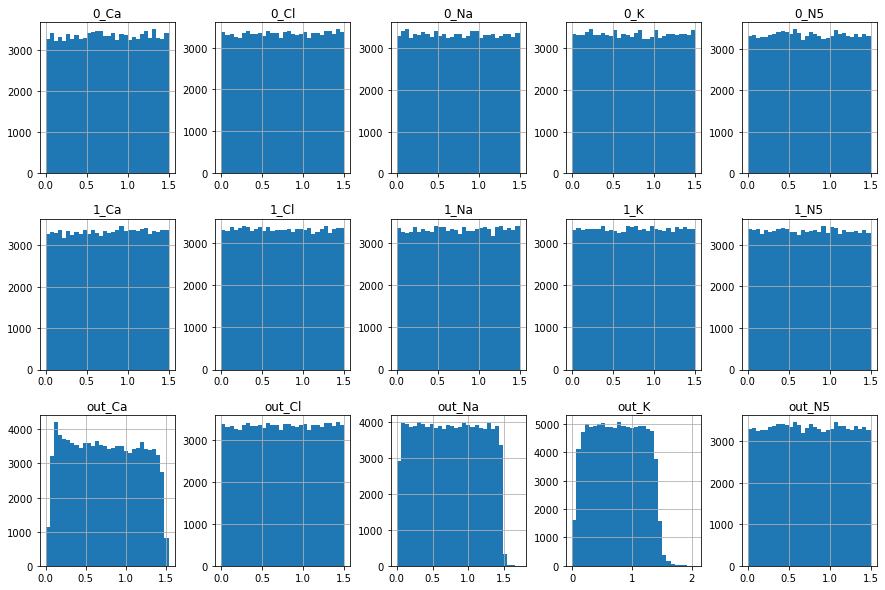

In [8]:
mpl.rcParams.update({'font.size': 10})
mpl.rc('xtick', labelsize=10) 
mpl.rc('ytick', labelsize=10) 
mpl.rc('axes', labelsize=10)

df.hist(alpha=1.,figsize = (15,10), layout=(3,5), bins=30);

In [10]:
df_corr_matrix = df.corr()
df_corr_matrix
df_corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(4)
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

/tmp/ipykernel_6578/2324509408.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(4)


,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
0_Ca,1.0000,0.0026,-0.0046,0.0010,0.0001,0.0043,-0.0035,-0.0070,-0.0015,0.0046,0.9953,0.0026,0.0082,0.0583,0.0001
0_Cl,0.0026,1.0000,0.0029,-0.0026,0.0025,0.0031,0.0037,0.0026,0.0004,-0.0006,0.0023,1.0000,0.0032,-0.0022,0.0025
0_Na,-0.0046,0.0029,1.0000,0.0013,0.0005,0.0012,0.0039,-0.0014,0.0031,0.0016,0.0041,0.0029,0.9991,0.0029,0.0005
0_K,0.0010,-0.0026,0.0013,1.0000,0.0023,0.0012,-0.0010,0.0074,-0.0027,-0.0024,0.0404,-0.0026,0.0035,0.9853,0.0023
0_N5,0.0001,0.0025,0.0005,0.0023,1.0000,-0.0012,0.0011,0.0029,-0.0035,-0.0024,0.0000,0.0025,0.0008,0.0024,1.0000
1_Ca,0.0043,0.0031,0.0012,0.0012,-0.0012,1.0000,0.0049,0.0042,0.0027,0.0019,0.0497,0.0032,-0.0151,-0.0751,-0.0012
1_Cl,-0.0035,0.0037,0.0039,-0.0010,0.0011,0.0049,1.0000,0.0012,0.0043,0.0030,-0.0036,0.0037,0.0038,-0.0010,0.0011
1_Na,-0.0070,0.0026,-0.0014,0.0074,0.0029,0.0042,0.0012,1.0000,-0.0044,-0.0022,-0.0159,0.0026,0.0187,0.0048,0.0029
1_K,-0.0015,0.0004,0.0031,-0.0027,-0.0035,0.0027,0.0043,-0.0044,1.0000,-0.0024,-0.0441,0.0004,0.0007,0.0876,-0.0035
1_N5,0.0046,-0.0006,0.0016,-0.0024,-0.0024,0.0019,0.0030,-0.0022,-0.0024,1.0000,0.0048,-0.0006,0.0015,-0.0026,-0.0024


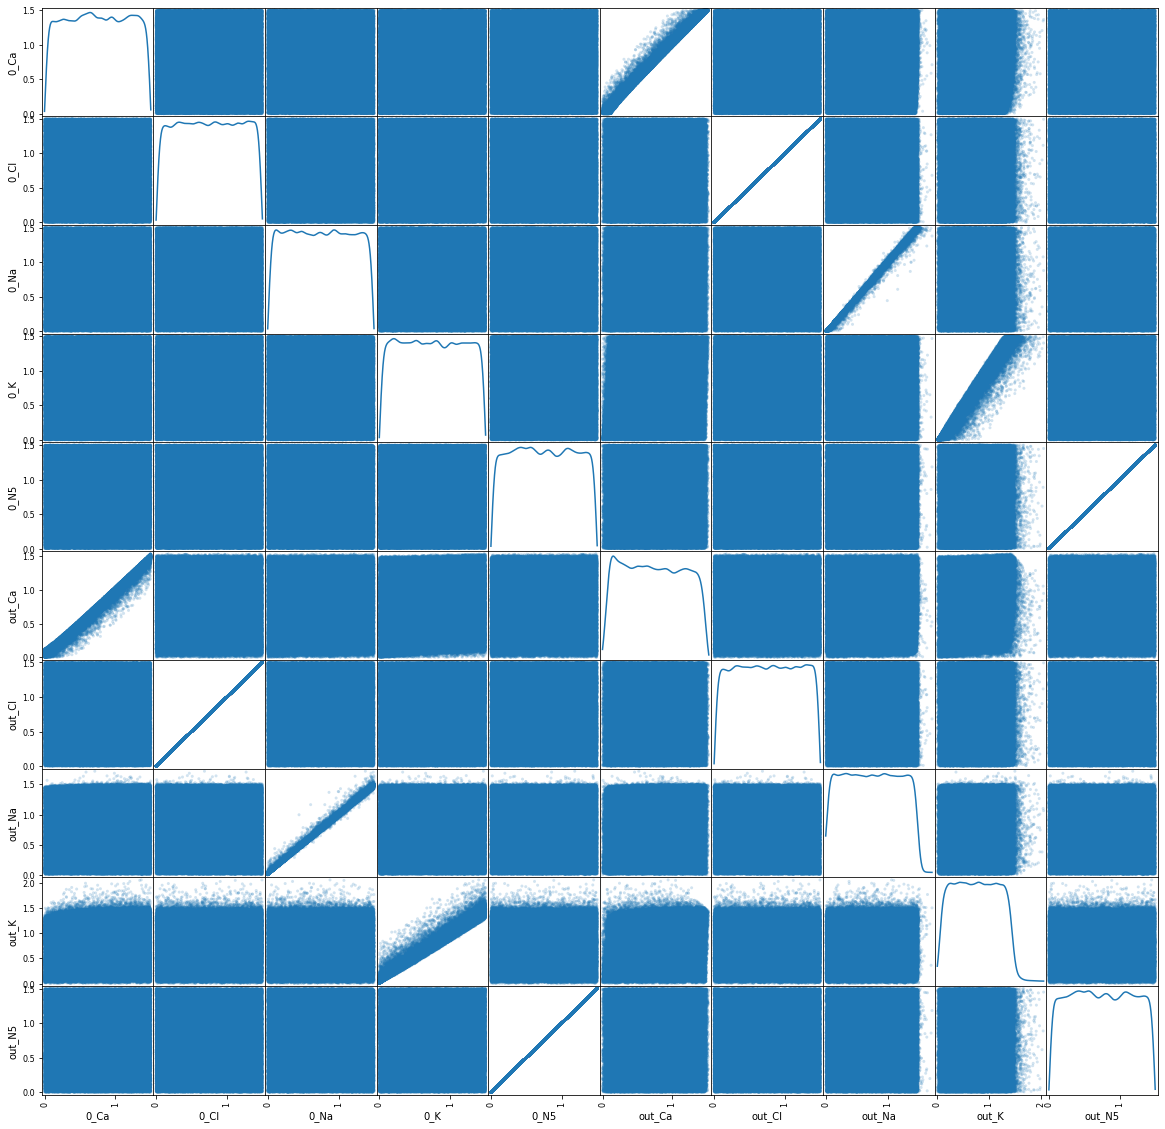

In [55]:
mpl.rcParams.update({'font.size': 10})
mpl.rc('xtick', labelsize=10) 
mpl.rc('ytick', labelsize=10) 
mpl.rc('axes', labelsize=10)

pd.plotting.scatter_matrix(df.iloc[:,[0,1,2,3,4,10,11,12,13,14]], 
                           alpha=0.2,
                           diagonal='kde',
                           figsize = (20,20));

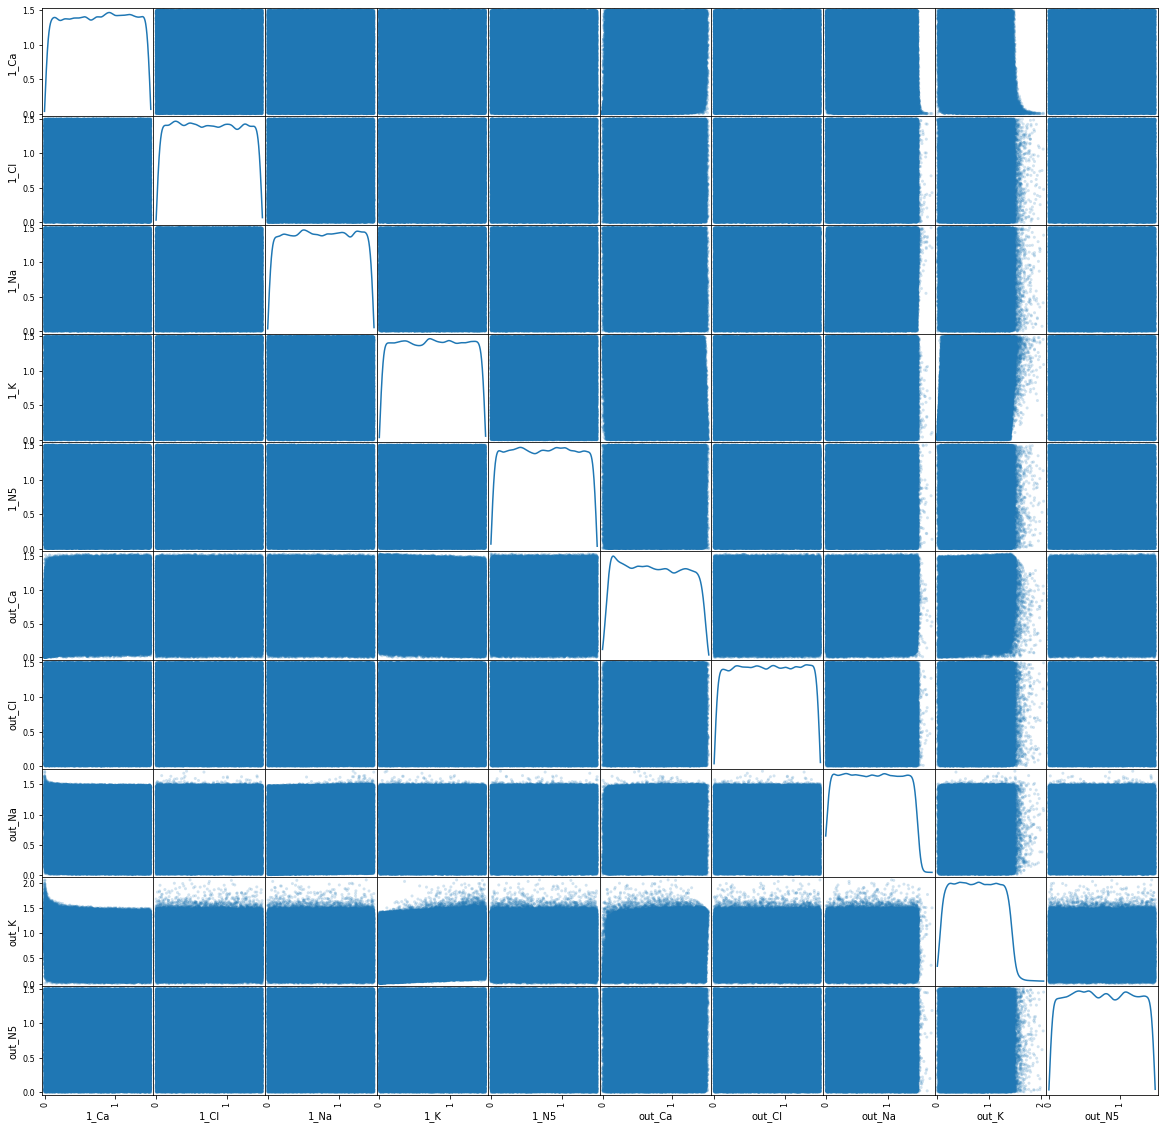

In [56]:
mpl.rcParams.update({'font.size': 10})
mpl.rc('xtick', labelsize=10) 
mpl.rc('ytick', labelsize=10) 
mpl.rc('axes', labelsize=10)

pd.plotting.scatter_matrix(df.iloc[:,[5,6,7,8,9,10,11,12,13,14]], 
                           alpha=0.2,
                           diagonal='kde',
                           figsize = (20,20));